Given a cleaned dataset, performs hierarchical clustering. Saves results to `combined_data/hierarchical.xlsx`

# Imports

In [141]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from xlwt import Workbook

Perform Hierarchical Clustering

Define the number of clusters

In [142]:
NUM_CLUSTERS = 15

In [143]:
# grab data
botnets = pd.read_csv("combined_data/combined_datasets.csv")

# get all the features except StartTime and Label
x = botnets.iloc[:,1:14]
botnet_header = botnets['Label'].tolist()

In [144]:
# dendrogram = sch.dendrogram(sch.linkage(x, method="ward"))
# plt.title('Dendrogram')
# plt.xlabel('')
# plt.ylabel('')
# plt.show()

Perform hierarchical clustering

In [145]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(NUM_CLUSTERS, affinity = 'euclidean', linkage='ward')
y_hc = hc.fit_predict(x)


In [146]:
# create a list of dictionaries. Each index in the list represents a cluster. Each dictionary represents the counts in that cluster.
clusters = [] 
for i in range(0, NUM_CLUSTERS):
    clusters.append({'Neris': 0, 'Virut': 0, 'Murlo': 0, 'Sogou': 0, 'Rbot': 0, 'Menti': 0})


# loop through each bot. Identify its cluster. 
index = 0
for cluster_num in y_hc: # for each cluster, count the number of each botnet family present
    clusters[cluster_num][botnet_header[index]] += 1
    index += 1 # move to the next bot in the list


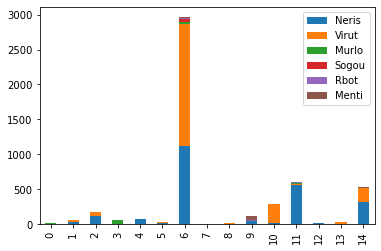

In [147]:
df = pd.DataFrame(clusters)
df.plot(kind="bar", stacked=True)
sheet_name = 'Sheet1'
writer = pd.ExcelWriter('combined_data/hierarchical.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name=sheet_name)

workbook = writer.book
worksheet = writer.sheets[sheet_name]

chart = workbook.add_chart({'type': 'bar', 'subtype': 'stacked'})

# cat_botnet = list(df.columns.values)
                           
# Configure the charts from the dataframe data
for col_num in range(1, len(clusters[0].keys()) + 1):
    
    letter = chr(ord('@')+col_num)
    str = '={}!${}$1:${}{}'.format(sheet_name, letter, letter, NUM_CLUSTERS)
    
    chart.add_series({
        'name': cat_botnet[col_num-1],
        'values': str,
    })
                           
worksheet.insert_chart('A40', chart)
writer.save()

In [148]:
print('success!')

success!
